In [90]:
! pip install pandas geopandas numpy matplotlib descartes pygeos

In [91]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [92]:
%matplotlib inline

In [93]:
plt.rcParams['figure.figsize'] = (20, 10)

In [94]:
madrid = gpd.read_file('data/districts.geojson').dropna().to_crs("crs")
madrid.rename(columns={'name': 'district'}, inplace=True)
madrid = madrid[['district', 'geometry']]
madrid['district'] = madrid['district'].str.lower()
madrid.head()

,district,geometry
0,centro,"MULTIPOLYGON (((-3.69185 40.40853, -3.69189 40..."
1,arganzuela,"MULTIPOLYGON (((-3.70258 40.40638, -3.70166 40..."
2,retiro,"MULTIPOLYGON (((-3.66279 40.40971, -3.66384 40..."
3,salamanca,"MULTIPOLYGON (((-3.65809 40.43945, -3.65828 40..."
4,chamartin,"MULTIPOLYGON (((-3.67231 40.48388, -3.67237 40..."


In [95]:
stations_bare = pd.read_csv('datasets/air/stations.csv', sep=';', skip_blank_lines=True).dropna()
stations_bare.head()

,code,longitude,latitude
0,4,-3.712257,40.423882
1,8,-3.682316,40.421553
2,11,-3.677349,40.451473
3,16,-3.639242,40.440046
4,17,-3.713317,40.347147


In [96]:
air_quality = pd.read_csv('datasets/air/air_quality_202010.csv', sep=';', skip_blank_lines=True).dropna()
air_quality.rename(columns={
    'PROVINCIA': 'province',
    'MUNICIPIO': 'municipality',
    'ESTACION': 'station',
    'MAGNITUD': 'type',
    'PUNTO_MUESTREO': 'datapoint'
}, inplace=True)
air_quality.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,4,1,28079004_1_38,2020,1,9.0,V,10.0,...,0.0,N,0.0,N,0.0,N,6.0,N,7.0,V
1,28,79,4,1,28079004_1_38,2020,2,8.0,V,9.0,...,9.0,V,11.0,V,1.0,N,0.0,N,0.0,N
2,28,79,4,1,28079004_1_38,2020,3,0.0,N,3.0,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
3,28,79,4,1,28079004_1_38,2020,4,0.0,N,0.0,...,0.0,N,0.0,N,14.0,N,8.0,V,0.0,N
4,28,79,4,1,28079004_1_38,2020,5,5.0,V,4.0,...,4.0,V,4.0,V,4.0,V,4.0,V,4.0,V


In [97]:
air_quality_carbon_monoxide = air_quality[air_quality['type'] == 6]
air_quality_carbon_monoxide.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
10,28,79,4,6,28079004_6_48,2020,1,0.7,V,0.7,...,0.0,N,0.0,N,0.0,N,0.1,N,0.1,V
11,28,79,4,6,28079004_6_48,2020,2,0.1,V,0.1,...,0.1,V,0.2,V,0.6,N,0.0,N,0.0,N
12,28,79,4,6,28079004_6_48,2020,3,0.0,N,0.1,...,0.0,N,0.0,N,0.0,N,0.0,N,0.0,N
13,28,79,4,6,28079004_6_48,2020,4,0.0,N,0.0,...,0.0,N,0.0,N,0.1,N,0.1,V,0.0,N
14,28,79,4,6,28079004_6_48,2020,5,0.1,V,0.1,...,0.1,V,0.1,V,0.1,V,0.1,V,0.1,V


In [98]:
air_quality_carbon_methane = air_quality[air_quality['type'] == 43]
air_quality_carbon_methane.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
170,28,79,8,43,28079008_43_2,2020,1,1.96,V,1.63,...,1.52,V,1.38,V,1.36,V,1.37,V,1.38,V
171,28,79,8,43,28079008_43_2,2020,2,1.36,V,1.45,...,1.40,V,1.50,V,1.51,V,0.00,N,0.00,N
172,28,79,8,43,28079008_43_2,2020,3,1.39,V,1.39,...,1.42,V,1.44,V,1.56,V,1.42,V,1.43,V
173,28,79,8,43,28079008_43_2,2020,4,1.42,V,1.45,...,1.26,V,1.26,V,1.27,V,1.25,V,0.00,N
174,28,79,8,43,28079008_43_2,2020,5,1.25,V,1.26,...,1.31,V,1.32,V,1.32,V,1.34,V,1.31,V


In [99]:
air_quality_carbon_pm10 = air_quality[air_quality['type'] == 10]
air_quality_carbon_pm10.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
100,28,79,8,10,28079008_10_47,2020,1,37.0,V,30.0,...,17.0,V,11.0,V,12.0,V,13.0,V,9.0,V
101,28,79,8,10,28079008_10_47,2020,2,9.0,V,12.0,...,80.0,V,72.0,V,45.0,V,0.0,N,0.0,N
102,28,79,8,10,28079008_10_47,2020,3,10.0,V,6.0,...,11.0,V,7.0,V,11.0,V,8.0,V,5.0,V
103,28,79,8,10,28079008_10_47,2020,4,7.0,V,7.0,...,11.0,V,9.0,V,10.0,V,13.0,V,0.0,N
104,28,79,8,10,28079008_10_47,2020,5,19.0,V,14.0,...,21.0,V,18.0,V,27.0,V,29.0,V,20.0,V


In [100]:
air_quality_carbon_pm25 = air_quality[air_quality['type'] == 9]
air_quality_carbon_pm25.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
90,28,79,8,9,28079008_9_47,2020,1,29.0,V,19.0,...,10.0,V,6.0,V,6.0,V,6.0,V,5.0,V
91,28,79,8,9,28079008_9_47,2020,2,6.0,V,9.0,...,17.0,V,19.0,V,13.0,V,0.0,N,0.0,N
92,28,79,8,9,28079008_9_47,2020,3,3.0,V,2.0,...,8.0,V,5.0,V,9.0,V,6.0,V,4.0,V
93,28,79,8,9,28079008_9_47,2020,4,5.0,V,5.0,...,7.0,V,6.0,V,6.0,V,7.0,V,0.0,N
94,28,79,8,9,28079008_9_47,2020,5,16.0,V,12.0,...,13.0,V,9.0,V,12.0,V,16.0,V,12.0,V


<AxesSubplot:>

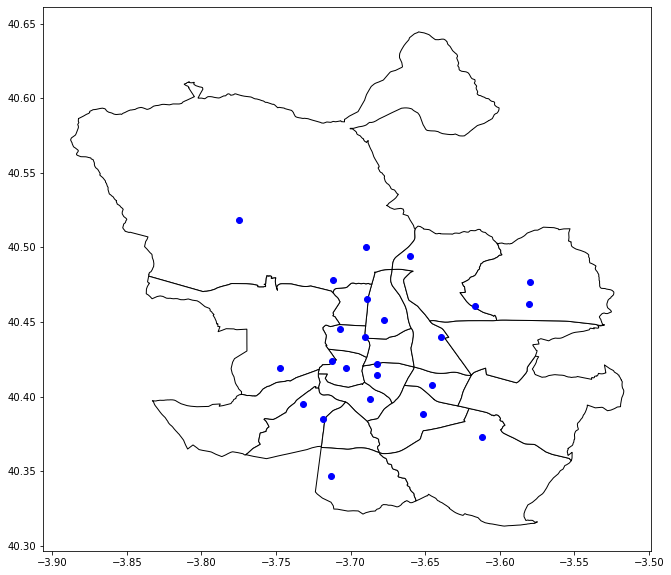

In [101]:
stations = gpd.GeoDataFrame(
    stations_bare, 
    geometry=gpd.points_from_xy(stations_bare.longitude, stations_bare.latitude))
base_map = madrid.plot(color='white', edgecolor='black')
stations.plot(ax=base_map, color='blue')

In [102]:
averages = []
for i in air_quality_carbon_monoxide.itertuples():
    #print(type(i))
    values = []
    for d in range(1, 31):
        value_key = f'D{d}'
        validation_key = f'V{d}'
        if d < 10:
            value_key = f'D0{d}'
            validation_key = f'V0{d}'
        if (getattr(i, validation_key) == 'V'):
            values.append(getattr(i, value_key))
    if len(values) == 0:
        averages.append(0)
    else:
        averages.append(np.mean(values))
#print(averages)
air_quality_carbon_monoxide = air_quality_carbon_monoxide.assign(avg=averages)
#air_quality_carbon_monoxide['avg'] = averages
air_quality_carbon_monoxide

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,V27,D28,V28,D29,V29,D30,V30,D31,V31,avg
10,28,79,4,6,28079004_6_48,2020,1,0.7,V,0.7,...,N,0.0,N,0.0,N,0.1,N,0.1,V,0.510526
11,28,79,4,6,28079004_6_48,2020,2,0.1,V,0.1,...,V,0.2,V,0.6,N,0.0,N,0.0,N,0.285714
12,28,79,4,6,28079004_6_48,2020,3,0.0,N,0.1,...,N,0.0,N,0.0,N,0.0,N,0.0,N,0.000000
13,28,79,4,6,28079004_6_48,2020,4,0.0,N,0.0,...,N,0.0,N,0.1,N,0.1,V,0.0,N,0.100000
14,28,79,4,6,28079004_6_48,2020,5,0.1,V,0.1,...,V,0.1,V,0.1,V,0.1,V,0.1,V,0.104000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,28,79,57,6,28079057_6_48,2020,6,0.2,V,0.2,...,V,0.2,V,0.2,V,0.2,V,0.0,N,0.200000
1356,28,79,57,6,28079057_6_48,2020,7,0.2,V,0.2,...,V,0.2,V,0.2,V,0.2,V,0.2,V,0.200000
1357,28,79,57,6,28079057_6_48,2020,8,0.2,V,0.2,...,V,0.2,V,0.2,V,0.2,V,0.2,V,0.193333
1358,28,79,57,6,28079057_6_48,2020,9,0.3,V,0.2,...,V,0.3,V,0.3,V,0.3,V,0.0,N,0.216667


In [103]:
with_stations = air_quality_carbon_monoxide.merge(stations_bare, left_on='station', right_on='code')
with_stations = with_stations.set_geometry('geometry')
# ax = madrid.plot(color='white', edgecolor='black')
# with_stations.plot(column='avg', ax=ax, cmap='YlOrBr')

In [104]:
grouped = with_stations.groupby(['station', 'ANO'])
grouped.head()

,province,municipality,station,type,datapoint,ANO,MES,D01,V01,D02,...,V29,D30,V30,D31,V31,avg,code,longitude,latitude,geometry
0,28,79,4,6,28079004_6_48,2020,1,0.7,V,0.7,...,N,0.1,N,0.1,V,0.510526,4,-3.712257,40.423882,POINT (-3.71226 40.42388)
1,28,79,4,6,28079004_6_48,2020,2,0.1,V,0.1,...,N,0.0,N,0.0,N,0.285714,4,-3.712257,40.423882,POINT (-3.71226 40.42388)
2,28,79,4,6,28079004_6_48,2020,3,0.0,N,0.1,...,N,0.0,N,0.0,N,0.000000,4,-3.712257,40.423882,POINT (-3.71226 40.42388)
3,28,79,4,6,28079004_6_48,2020,4,0.0,N,0.0,...,N,0.1,V,0.0,N,0.100000,4,-3.712257,40.423882,POINT (-3.71226 40.42388)
4,28,79,4,6,28079004_6_48,2020,5,0.1,V,0.1,...,V,0.1,V,0.1,V,0.104000,4,-3.712257,40.423882,POINT (-3.71226 40.42388)
10,28,79,8,6,28079008_6_48,2020,1,0.7,V,0.6,...,V,0.4,V,0.4,V,0.506667,8,-3.682316,40.421553,POINT (-3.68232 40.42155)
11,28,79,8,6,28079008_6_48,2020,2,0.3,V,0.3,...,V,0.0,N,0.0,N,0.462069,8,-3.682316,40.421553,POINT (-3.68232 40.42155)
12,28,79,8,6,28079008_6_48,2020,3,0.3,V,0.3,...,V,0.3,V,0.3,V,0.316667,8,-3.682316,40.421553,POINT (-3.68232 40.42155)
13,28,79,8,6,28079008_6_48,2020,4,0.3,V,0.3,...,V,0.2,V,0.0,N,0.226667,8,-3.682316,40.421553,POINT (-3.68232 40.42155)
14,28,79,8,6,28079008_6_48,2020,5,0.2,V,0.2,...,V,0.2,V,0.2,V,0.203333,8,-3.682316,40.421553,POINT (-3.68232 40.42155)


In [105]:
top = cm.get_cmap('Oranges', 128)
bottom = cm.get_cmap('Reds', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
blueRed = ListedColormap(newcolors, name='BlueRed')

station  ANO 
4        2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
8        2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
16       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
18       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
24       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
35       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
36       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
39       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
56       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
57       2020    AxesSubplot(0.301226,0.125;0.422548x0.755)
dtype: object

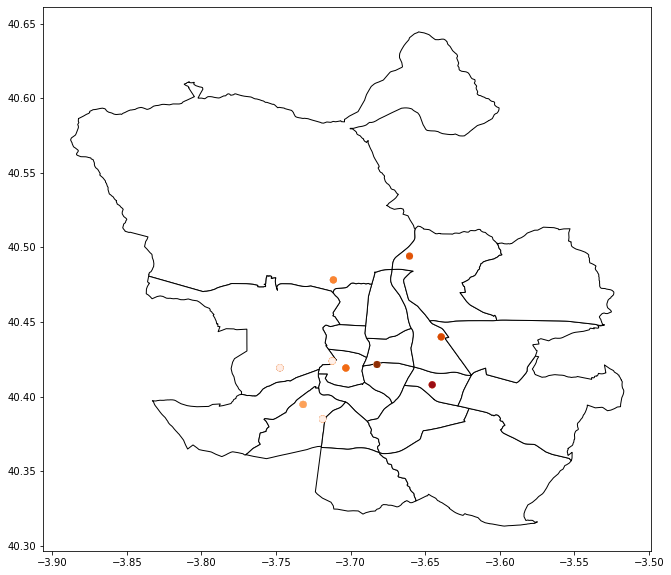

In [115]:
ax = madrid.plot(color='white', edgecolor='black')
grouped.plot(column='avg', ax=ax, cmap=blueRed)